<a href="https://colab.research.google.com/github/manishsinha44/Machine-Learning/blob/main/TShirt_Size_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('Tshirt_Sizing_Dataset.csv')

In [7]:
df.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


In [8]:
X = df.iloc[:,0:2].values

In [9]:
X.shape

(18, 2)

In [10]:
y = df.iloc[:,2].values

In [11]:
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lencoder_y = LabelEncoder()
y = lencoder_y.fit_transform(y)

In [15]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski',p=2)

In [18]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
y_pred = knn.predict(X_test)

In [20]:
y_pred

array([1, 1, 0, 0, 0])

In [21]:
y_test

array([1, 1, 0, 0, 0])

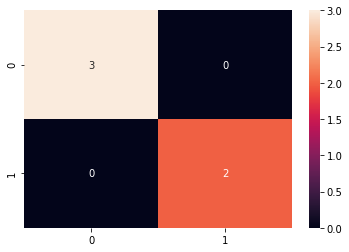

In [22]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


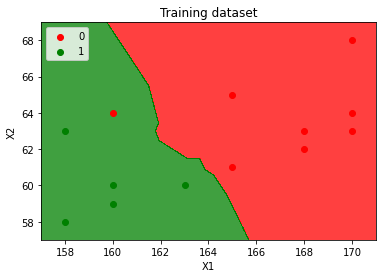

In [28]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() - 1, stop = X_grid[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_grid[:, 1].min() - 1, stop = X_grid[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()